In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [30]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [31]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

print()

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [32]:
import torch
x = torch.arange(6)
print(x.shape, x.size())
x = x.reshape(2, 3)
print(x.shape, x.size())
print(torch.arange(6).numel())
print(x.reshape(3, -1))

torch.Size([6]) torch.Size([6])
torch.Size([2, 3]) torch.Size([2, 3])
6
tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [33]:
if 1 == 1.0:
    print(True)
else:
    print(False)

True


In [34]:
x = torch.arange(12)
y = torch.arange(12)
print(id(x), id(y))
y[:] = x + y
print(id(y))
y =x + y
print(id(y))

1443250156384 1443281460096
1443281460096
1443388152784


In [35]:
print(x > y, '\n', x == y, x < y)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False]) 
 tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False]) tensor([False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])


In [36]:
beta = 0.99
beta_zero = 0.9999
rou = 0.992
for  t in  range(400):
    beta_t = beta + (beta_zero - beta) * rou**(t)
    print(f'{beta_t:.10f}')

0.9999000000
0.9998208000
0.9997422336
0.9996642957
0.9995869814
0.9995102855
0.9994342032
0.9993587296
0.9992838598
0.9992095889
0.9991359122
0.9990628249
0.9989903223
0.9989183997
0.9988470525
0.9987762761
0.9987060659
0.9986364174
0.9985673260
0.9984987874
0.9984307971
0.9983633507
0.9982964439
0.9982300724
0.9981642318
0.9980989179
0.9980341266
0.9979698536
0.9979060948
0.9978428460
0.9977801032
0.9977178624
0.9976561195
0.9975948705
0.9975341116
0.9974738387
0.9974140480
0.9973547356
0.9972958977
0.9972375305
0.9971796303
0.9971221932
0.9970652157
0.9970086940
0.9969526244
0.9968970034
0.9968418274
0.9967870928
0.9967327960
0.9966789337
0.9966255022
0.9965724982
0.9965199182
0.9964677588
0.9964160168
0.9963646886
0.9963137711
0.9962632610
0.9962131549
0.9961634496
0.9961141420
0.9960652289
0.9960167071
0.9959685734
0.9959208248
0.9958734582
0.9958264706
0.9957798588
0.9957336199
0.9956877510
0.9956422490
0.9955971110
0.9955523341
0.9955079154
0.9954638521
0.9954201413
0.9953767801

In [37]:
r = torch.randperm(5)
print(r)

tensor([3, 4, 0, 1, 2])


In [38]:
from torchvision import datasets, transforms
train_dataset =  datasets.MNIST('./mnist_dataset', train=True, download=True)
print(len(train_dataset))

MemoryError: 

d:\INSTALL\Anaconda\envs\dl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\INSTALL\Anaconda\envs\dl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\INSTALL\Anaconda\envs\dl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\INSTALL\Anaconda\envs\dl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\INSTALL\Anaconda\envs\dl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from fon

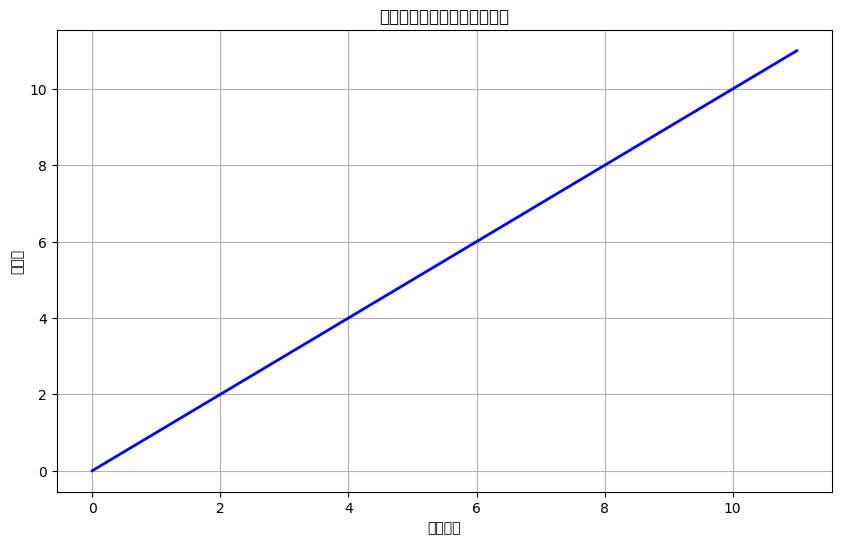

In [ ]:
from utils import plot
t = torch.arange(12).tolist()
plot(t)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs')
# writer.add_image()
for i in range(100):
    writer.add_scalar(tag='y=3*x', scalar_value=i, global_step=i)

writer.close() 

In [ ]:
A = [1, 2, 3]
for i in A:
    print(i)

1
2
3


In [46]:
import random
train_dataset =  datasets.MNIST('./mnist_dataset', train=True, download=True)
l = (train_dataset.targets.numpy().tolist())
nums = []
for i in range(10000):
    nums.append(random.randint(0, 100))
nums.sort()

s = 0
for i in nums:
    for j in nums:
        s += abs(i - j)

sum_nums = sum(nums)
pre = 0
s_t = 0

for i, num in enumerate(nums):
    s_t += num * i - pre + (sum_nums - pre - num) - (len(nums) - i - 1) * num
    pre += num
print(s, s_t, s_t == s)

3357178780 3357178780 True


In [9]:
print(chr(ord('a') + 25 - 1))

y
